In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from scipy import stats

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#df_dem_nb = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\TS_data_sum_MONPAT_allCols.csv")
#df_SAL['PERPAI'] = pd.to_datetime(df_SAL['PERPAI'], format='%d/%m/%Y')
#df_dem_nb['PERPAI'] = pd.to_datetime(df_dem_nb['PERPAI'], format='%d/%m/%Y')

In [10]:
#df_dem_nb = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\MONPAT.csv")
#df_SAL = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\MONSAL.csv")

In [2]:
df_dem_nb = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Analysis & Forecasting\1. Data\df_dem_nb.csv")
df_dem_nb['PERPAI'] = pd.to_datetime(df_dem_nb['PERPAI'])

In [197]:
# 2021 - 2022 - 2023 DATA

df_dem_nb = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Payroll\all_PAT.csv")
df_SAL = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Payroll\all_SAL.csv")
df_dem_nb['PERPAI'] = pd.to_datetime(df_dem_nb['PERPAI'], format='%Y-%m-%d')
df_SAL['PERPAI'] = pd.to_datetime(df_SAL['PERPAI'], format='%Y-%m-%d')
df_SAL = df_SAL.sort_values(by='PERPAI', ascending=False)
df_dem_nb = df_dem_nb.sort_values(by='PERPAI', ascending=False)

In [ ]:
# 2022 - 2023 DATA

df_dem_nb = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\MONPAT_dates.csv")
df_SAL = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Models\Time series models\MONSAL_dates.csv")
df_dem_nb['PERPAI'] = pd.to_datetime(df_dem_nb['PERPAI'], format='%Y-%m-%d')
df_SAL['PERPAI'] = pd.to_datetime(df_SAL['PERPAI'], format='%Y-%m-%d')


In [ ]:
def plot_many(List_names,s=1,p=0):
    l_p=[]
    l_s=[]
    for col in List_names :
        l_s.append(pd.Series(list(df_SAL[col]), index=list(df_SAL['PERPAI'])))
        l_p.append(pd.Series(list(df_dem_nb[col]), index=list(df_dem_nb['PERPAI'])))

    plt.subplots(1, 1, figsize=(25, 10))
    
    if s==1 & p==1 : 
        for i in range(len(l_s)) : 
            plt.plot(l_s[i],label=List_names[i]+'_SAL')
            plt.plot(l_p[i],label=List_names[i]+'_PAT')
            
    elif s==1 :
         for i in range(len(l_s)) : 
            plt.plot(l_s[i],label=List_names[i])
            
        
    elif p==1 :
         for i in range(len(l_p)) : 
            plt.plot(l_p[i],label=List_names[i])

    plt.legend()
    plt.show()
            

In [5]:
l_cols = df_dem_nb.columns

In [ ]:
L_prime = []
for col in df_SAL.columns :
    if col[:5].lower() == 'prime' or  col[:2].lower() == 'p.':
        L_prime.append(col)

l_cols_1 = [col for col in l_cols if col not in L_prime]

In [ ]:
L_Indemnité = []
for col in l_cols_1 :
    if col[:3].lower() == 'ind' :
        L_Indemnité.append(col)
        
l_cols_2 = [col for col in l_cols_1 if col not in L_Indemnité]

In [8]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# I. Group Leave rates (Demission)

Text(0.5, 1.0, 'Number of leaves')

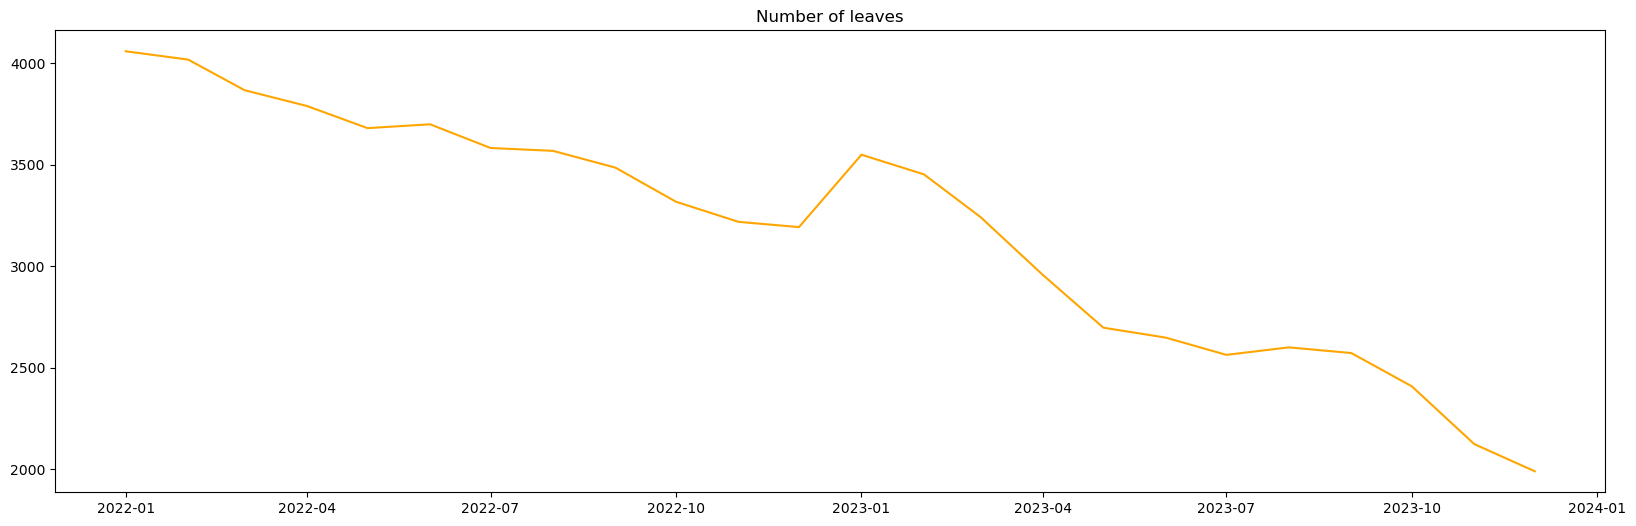

In [17]:
# PAT
plt.subplots(1, 1, figsize=(20, 6))
data = pd.Series(list(df_dem_nb['Nb_DEM']), index=list(df_dem_nb['PERPAI']))

plt.plot(data, color='orange')
#plt.plot(data1)
plt.title('Number of leaves')

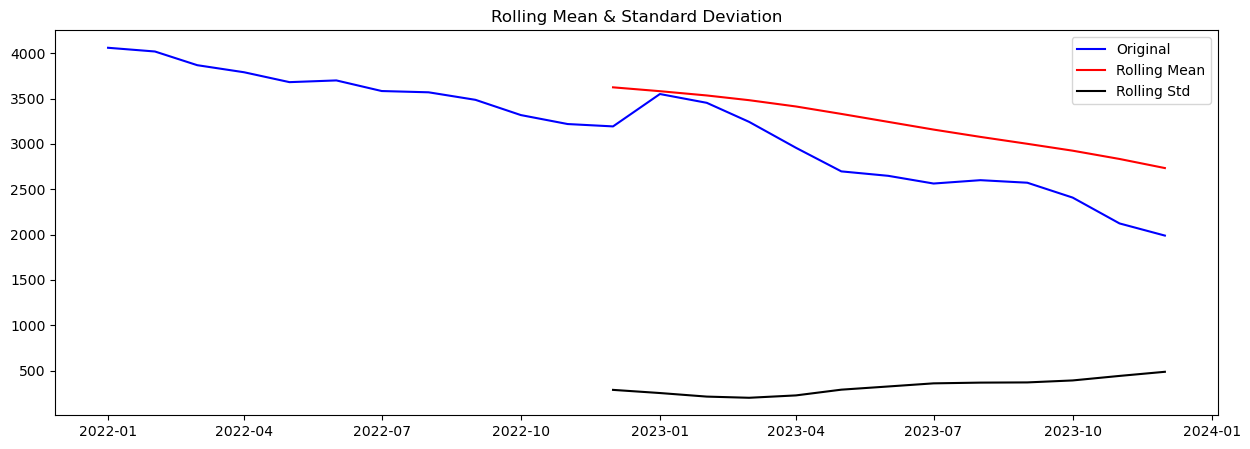

Results of Dickey-Fuller Test:
Test Statistic                 0.68
p-value                        0.99
#Lags Used                     3.00
Number of Observations Used   20.00
Critical Value (1%)           -3.81
Critical Value (5%)           -3.02
Critical Value (10%)          -2.65
dtype: float64


In [13]:
test_stationarity(data)

### a. Creating forecast & train indexes

In [18]:
# PAT
predict_start_date = pd.to_datetime('2023-09-01')
predict_end_date = pd.to_datetime('2024-06-01')

df_tr = df_dem_nb[df_dem_nb['PERPAI'] < predict_start_date]
df_forecast = df_dem_nb[df_dem_nb['PERPAI'] >= predict_start_date]

data_train = pd.Series(list(df_tr['Nb_DEM']), index=list(df_tr['PERPAI'] ))
data_forecast = pd.Series(list(df_forecast['Nb_DEM']), index=list(df_forecast['PERPAI'] ))

In [19]:
train_index = pd.date_range(start=data_train.index[0], end=data_train.index[-1], freq='MS')
forecast_index = pd.date_range(start=data_forecast.index[0], end=predict_end_date, freq='MS')

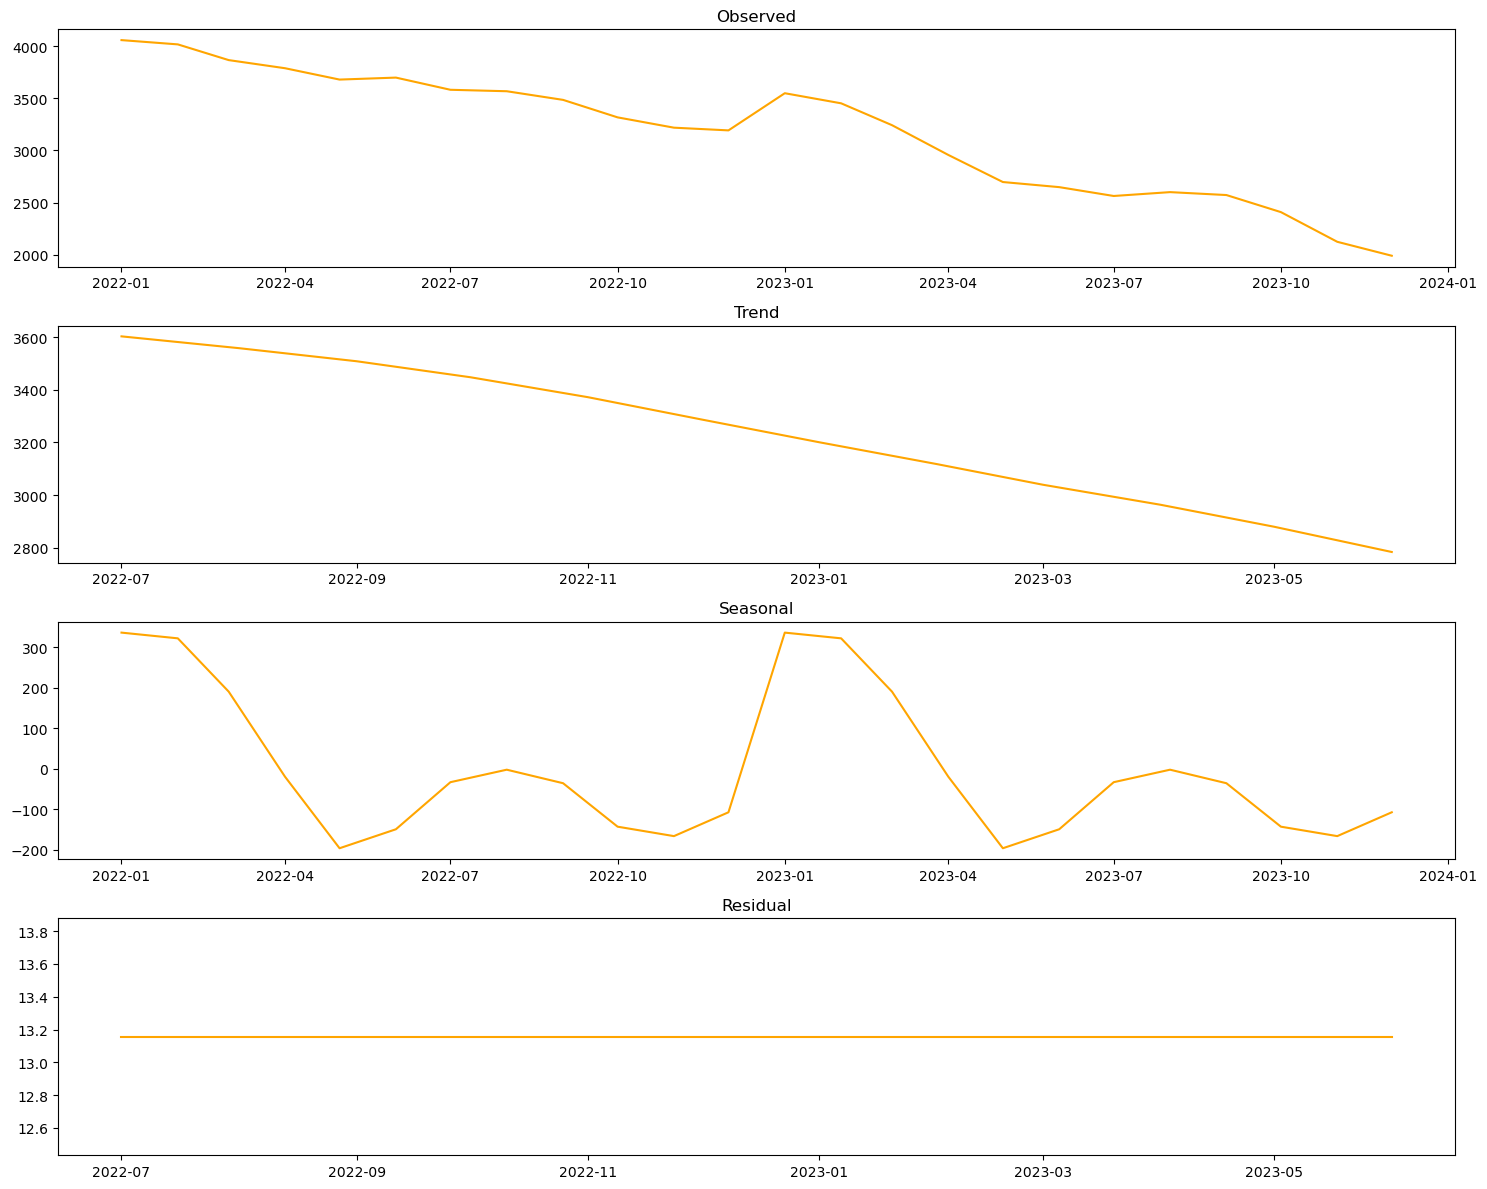

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive', period=12)  # Assuming daily seasonality for hourly data

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plot observed data
axes[0].plot(result.observed,color='orange')
axes[0].set_title('Observed')

# Plot trend data
axes[1].plot(result.trend,color='orange')
axes[1].set_title('Trend')

# Plot seasonal data
axes[2].plot(result.seasonal,color='orange')
axes[2].set_title('Seasonal')

# Plot residual data
axes[3].plot(result.resid,color='orange')
axes[3].set_title('Residual')

# Adjust layout and show plot
plt.tight_layout()

fig.savefig("Leave rates.png")

plt.show()


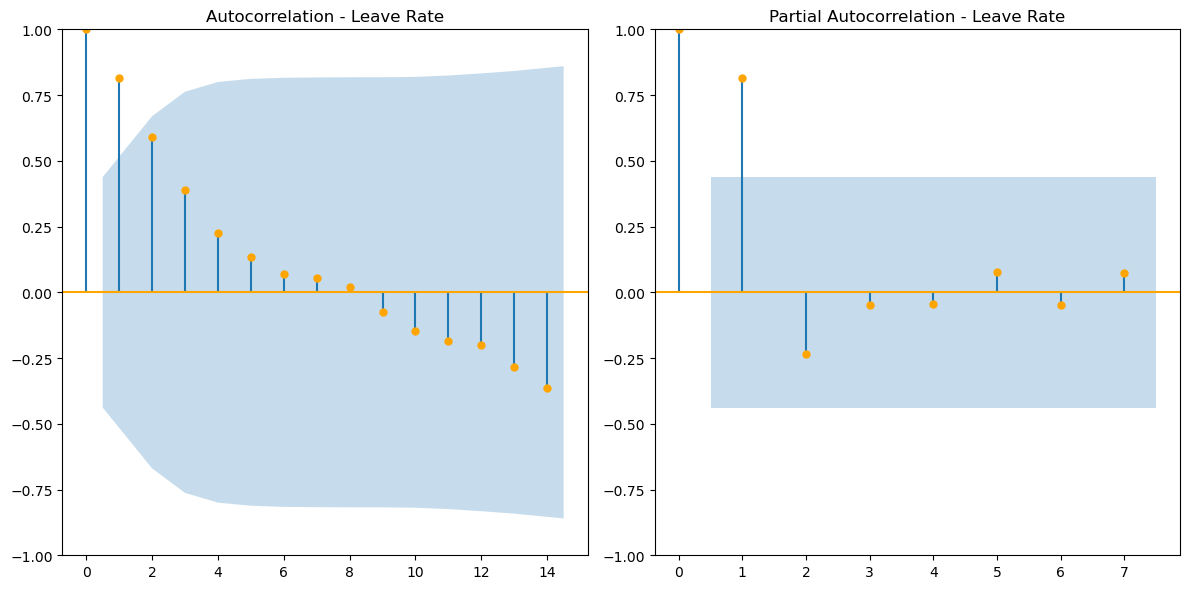

In [22]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_train, ax=axes[0], color='orange')
axes[0].set_title('Autocorrelation - Leave Rate')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_train, ax=axes[1], lags=7, color='orange')  
axes[1].set_title('Partial Autocorrelation - Leave Rate')


plt.tight_layout()

fig.savefig("ACF - PACF - Leave rates.png")
plt.show()

### Interpretation
- The first lag in theAutocorrelation plot is beyond the confidence interval, so it's significant enough to be considered. Beyond it, other lags start to decrease in length. Which indicates a q value of 1 for the MA component of the ARIMA model.
- The first lag in the Partial Autocorrelation plot is beyond the confidence interval, so it's significant enough to be considered. Beyond it, other lags start to decrease in length. Which indicates a p value of 1 for the AR component of the ARIMA model.

**--> This suggests the following orders for the model :  AR(p=1) ; MA(q=1) ==> ARIMA(1,I,1)**

### b. Differencing

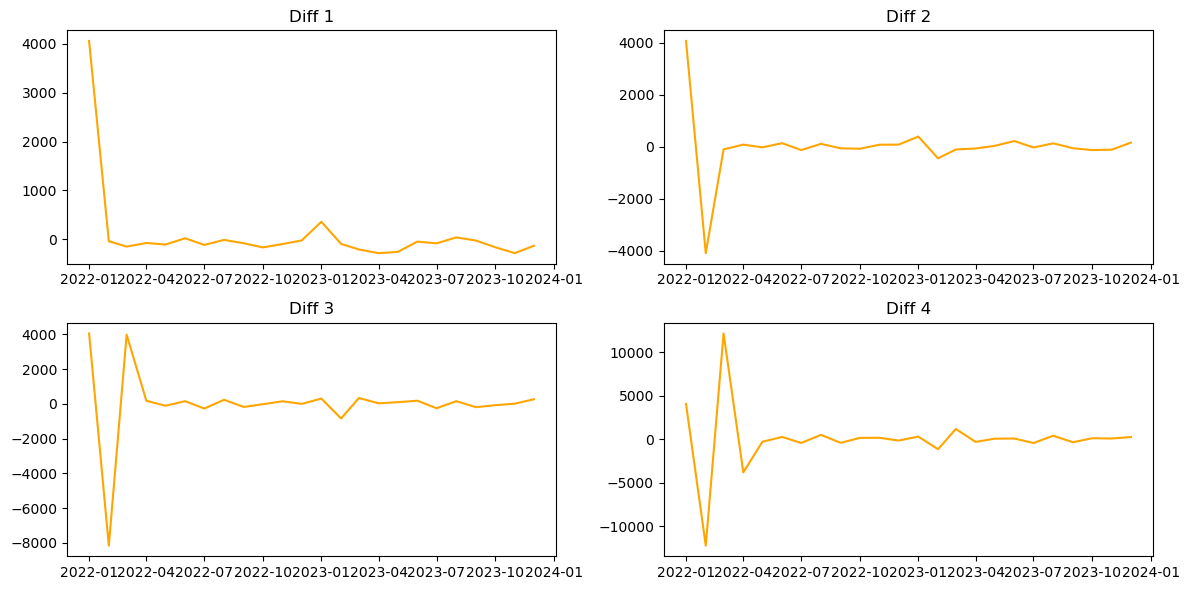

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Calculate the first and second differenced data
data_diff = data.diff().fillna(data_train)
data_diff2 = data_diff.diff().fillna(data_diff)
data_diff3 = data_diff2.diff().fillna(data_diff2)
data_diff4 = data_diff3.diff().fillna(data_diff3)

axes[0, 0].plot(data_diff,color='orange')
axes[0, 0].set_title('Diff 1')

# Plot second differenced data on the second subplot
axes[0, 1].plot(data_diff2,color='orange')
axes[0, 1].set_title('Diff 2')

# Plot third differenced data on the third subplot
axes[1, 0].plot(data_diff3,color='orange')
axes[1, 0].set_title('Diff 3')

# Plot fourth differenced data on the fourth subplot
axes[1, 1].plot(data_diff4,color='orange')
axes[1, 1].set_title('Diff 4')


# Adjust layout and show plot
plt.tight_layout()

fig.savefig("Differenced - Leave rates.png")
plt.show()


In [34]:
'''
plt.subplots(1, 1, figsize=(12, 6))

data_diff=data.diff().fillna(data)
data_diff2=data.diff().fillna(data_diff)
plt.plot(data_diff2)

plt.title('Differenced')
plt.show()
'''

"\nplt.subplots(1, 1, figsize=(12, 6))\n\ndata_diff=data.diff().fillna(data)\ndata_diff2=data.diff().fillna(data_diff)\nplt.plot(data_diff2)\n\nplt.title('Differenced')\nplt.show()\n"

In [25]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [26]:
perform_adf_test(data_diff)
perform_adf_test(data_diff2)
perform_adf_test(data_diff3)
perform_adf_test(data_diff4)

ADF Statistic: -3.117403
p-value: 0.025292
ADF Statistic: -4.024264
p-value: 0.001289
ADF Statistic: -3.552488
p-value: 0.006737
ADF Statistic: -0.753890
p-value: 0.832293


We can choose order 1, 2 or 3 differencing, since both give pvalues <= 5% ,

We decided to choose order 2 differencing, for higher gurantee since it gives a pvalue < 2% . 

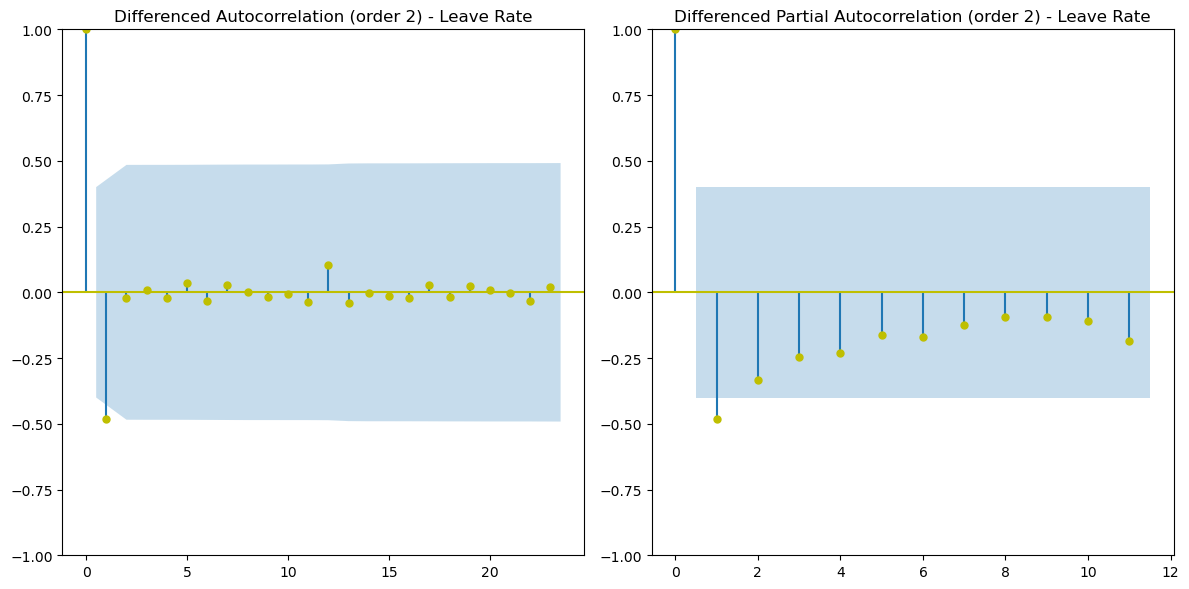

In [27]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_diff2, ax=axes[0], lags=23, color='y')
axes[0].set_title('Differenced Autocorrelation (order 2) - Leave Rate')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_diff2, ax=axes[1], lags=11, color='y')  
axes[1].set_title('Differenced Partial Autocorrelation (order 2) - Leave Rate')

plt.tight_layout()

fig.savefig("Differenced ACF - PACF - Leave rates.png")

plt.show()

### Interpretation
- Seasonality was not cearly detected in the previous plots, however, after differencing, we find a peak at the 12th lag for the Autocorrelation graph besides the 1st lag.
- Similarly, we observe a slight increase in the 12th lag for Partial Autocorrelation graph, besides the 1st lag.

--> This suggests seasonality of value s=11, and P = Q = 1 for the seasonal components of the ARIMA model.

Resulting in : **ARIMA(1,2,1) SARIMA(1,0,1)s=12**

### c. SARIMA fitting

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_train, order=(1,2,1), seasonal_order=(1,0,1,12))
model_fit = model.fit()

In [29]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   20
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -111.110
Date:                            Tue, 25 Jun 2024   AIC                            232.221
Time:                                    06:55:44   BIC                            236.672
Sample:                                01-01-2022   HQIC                           232.834
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5629      0.576      0.977      0.328      -0.566       1.692
ma.L1         -0.9998     12.699   

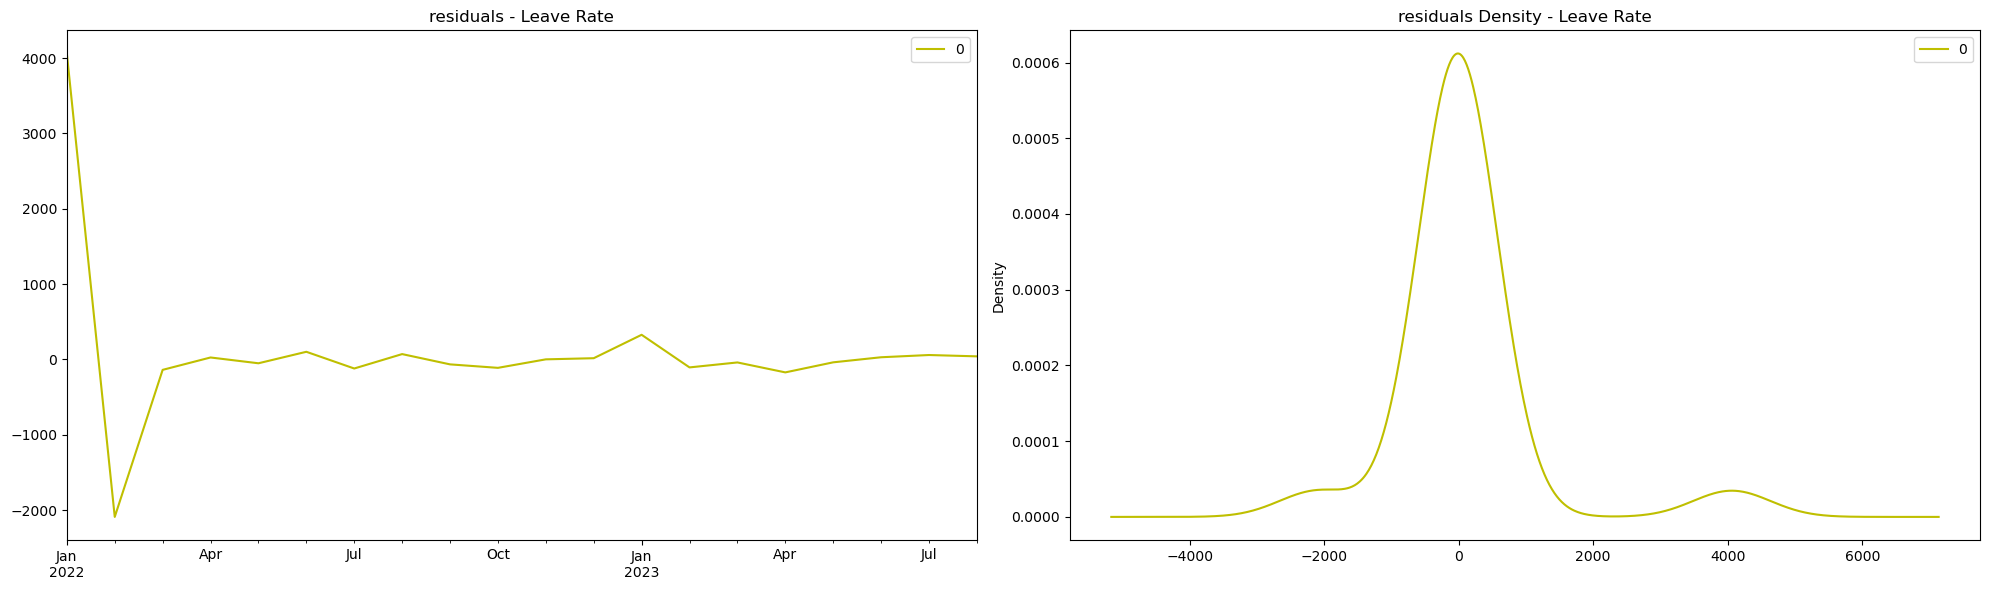

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=axes[0],c='y')
axes[0].set_title('residuals - Leave Rate')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1],c='y')
axes[1].set_title('residuals Density - Leave Rate')

plt.tight_layout()

fig.savefig("Residuals - Leave rates.png")

plt.show()

In [31]:
# summary stats of residuals
print(residuals.describe())

             0
count    20.00
mean     90.12
std    1049.14
min   -2089.52
25%    -107.06
50%     -18.41
75%      45.51
max    4060.00


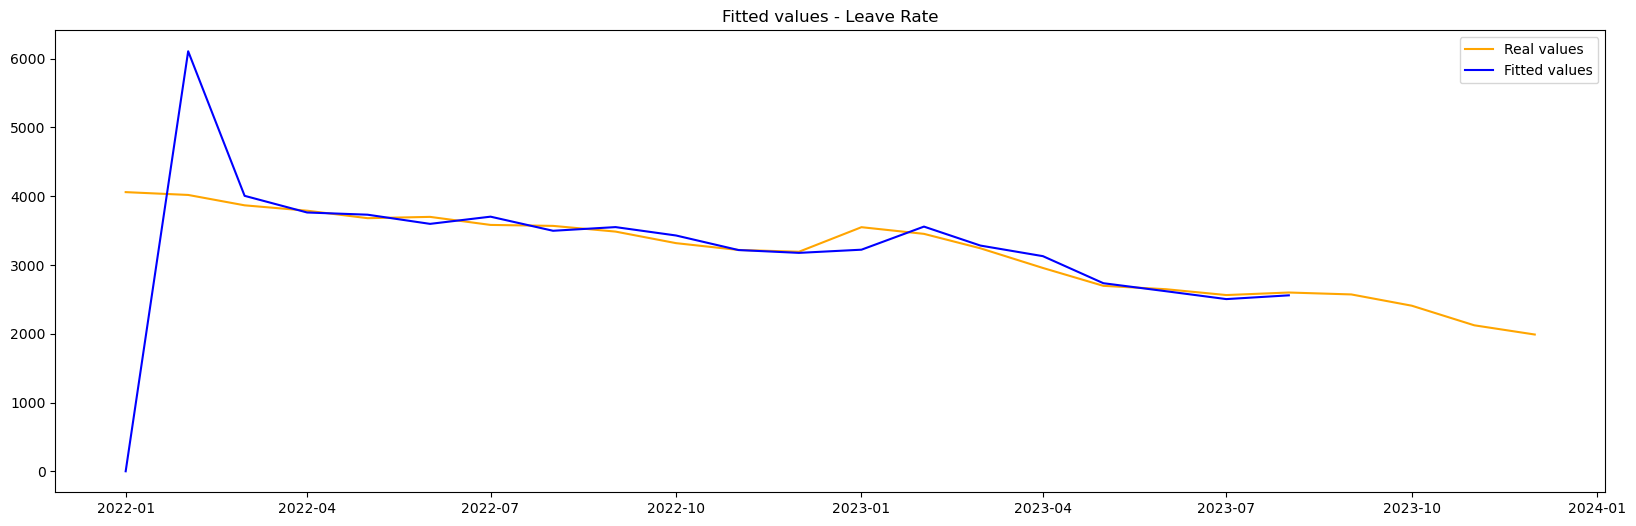

In [38]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data,color='orange')
plt.plot(model_fit.fittedvalues, color='blue')
plt.title('Fitted values - Leave Rate')
plt.legend(['Real values','Fitted values'])

plt.savefig("fitted values - Leave rates.png")

plt.show()

### d. Forecast

In [37]:
forecast = model_fit.predict(start=forecast_index[0], end=forecast_index[-1])

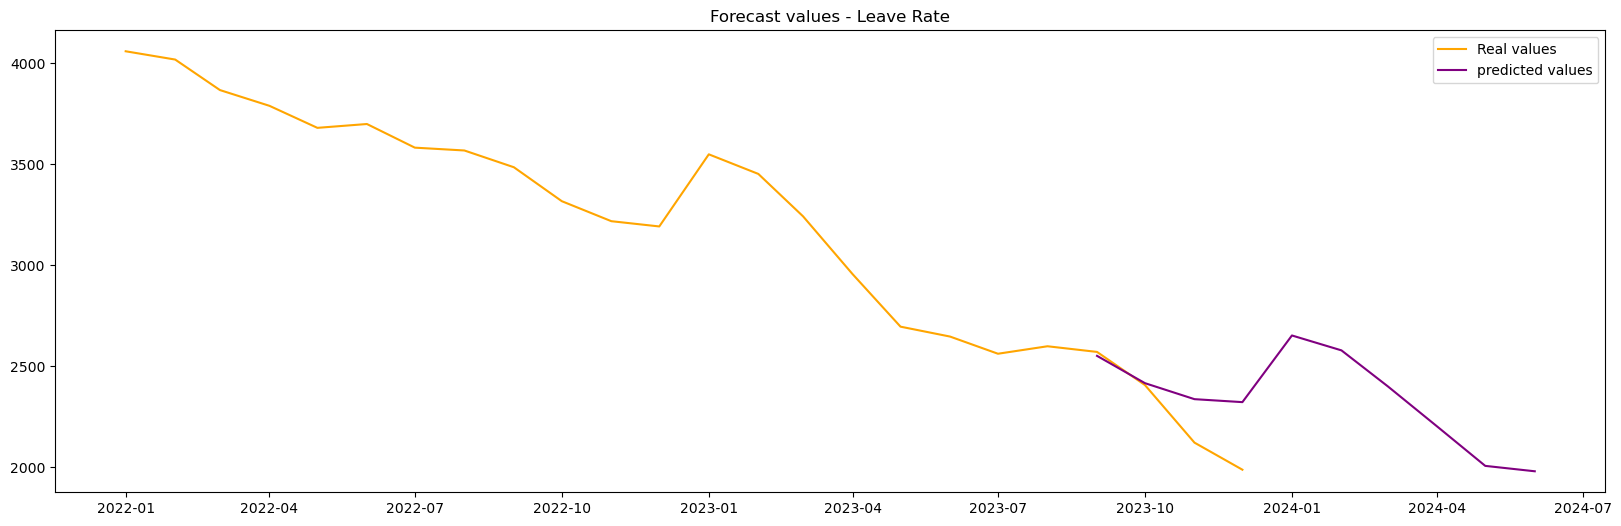

In [39]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data,color='orange')
plt.plot(forecast, color='purple')
plt.title('Forecast values - Leave Rate')
plt.legend(['Real values','predicted values'])

plt.savefig("forecast values - Leave rates.png")

plt.show()

### e. Evaluate Forecast

In [54]:
def evaluate_forecast(col, forecast):
    # compute mae
    mae_train = mean_absolute_error(train[col].values, forecast[:len(train)])
    mae_val = mean_absolute_error(val[col].values, forecast[-len(val):])

    # compute mse
    mse_train = mean_squared_error(train[col].values, forecast[:len(train)])
    mse_val = mean_squared_error(val[col].values, forecast[-len(val):])

    # compute mean_absolute_percentage_error
    mape_train = mean_absolute_percentage_error(train[col].values, forecast[:len(train)])
    mape_val = mean_absolute_percentage_error(val[col].values, forecast[-len(val):])

    # make a df to store the results
    df = pd.DataFrame({'mae': [mae_train, mae_val], 'mse': [mse_train, mse_val], 'mape': [mape_train, mape_val]}, index=['train', 'val'])
    return df

## DEMO

In [42]:
def Forecast_Leave(Forecast_Start_date,Forecast_End_date) : 

    Forecast_Start_date = pd.to_datetime(Forecast_Start_date, format='%Y-%m-%d')
    Forecast_End_date = pd.to_datetime(Forecast_End_date, format='%Y-%m-%d')
    
    forecast_index = pd.date_range(start=Forecast_Start_date, end=Forecast_End_date, freq='MS')
    forecast = model_fit.predict(start=forecast_index[0], end=forecast_index[-1])
    
    plt.subplots(1, 1, figsize=(20, 6))

    plt.plot(data,color='orange')
    plt.plot(forecast, color='purple')
    plt.title('Forecast values')
    plt.legend(['Real values','predicted values'])

    plt.savefig("forecast values - Leave rates.png")
    plt.show()

In [43]:
predict_start_date = pd.to_datetime('2023-06-01')
predict_end_date = pd.to_datetime('2023-12-01')

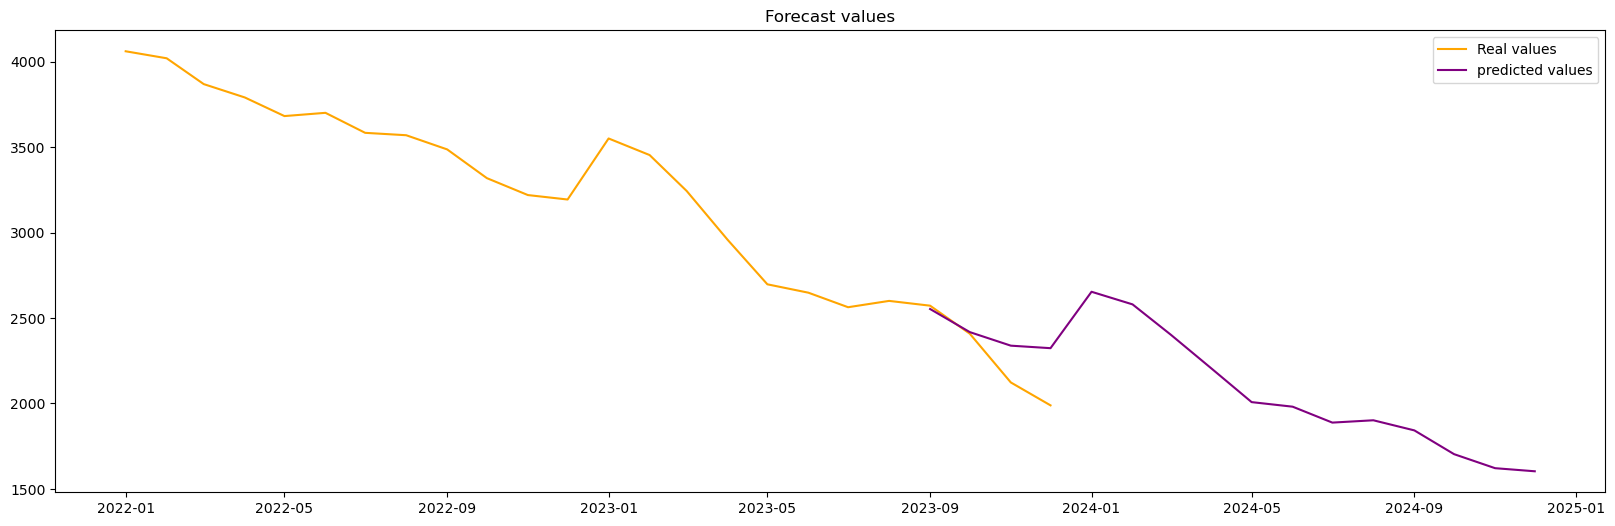

In [44]:
Forecast_Leave('2023-09-01','2024-12-01')

# III. Turnover rates

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Analysis & Forecasting\1. Data\df_dem_emp_nb_turnOv.csv")
df['PERPAI'] = pd.to_datetime(df['PERPAI'])

In [4]:
df

,PERPAI,Nb_DEM,In_TRA,NB_employ,Turnover
0,2022-01-01,4060,6906,10966,36.94
1,2022-02-01,4019,6995,11014,36.72
2,2022-03-01,3868,7009,10877,35.64
3,2022-04-01,3790,7041,10831,35.17
4,2022-05-01,3681,7041,10722,34.17
5,2022-06-01,3700,7121,10821,32.23
6,2022-07-01,3583,8556,12139,31.27
7,2022-08-01,3569,7210,10779,33.21
8,2022-09-01,3486,7231,10717,32.77
9,2022-10-01,3318,7240,10558,31.48


Text(0.5, 1.0, 'TurnOver Rate')

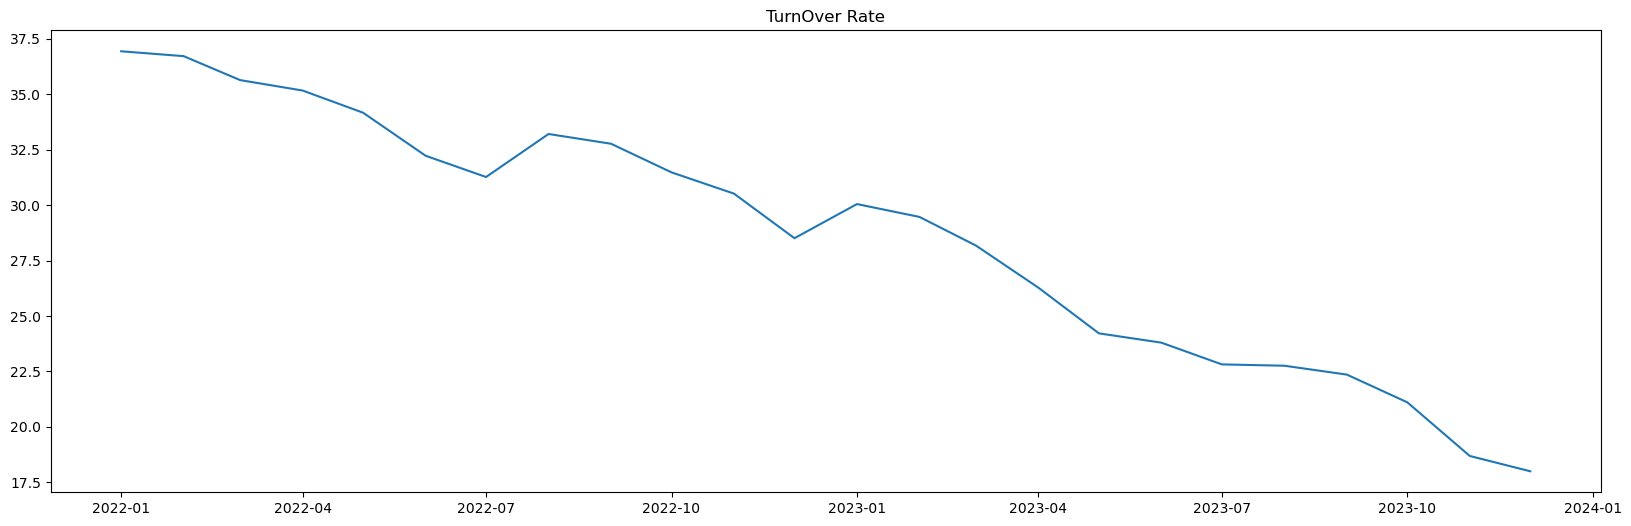

In [5]:
plt.subplots(1, 1, figsize=(20, 6))
data_TO = pd.Series(list(df['Turnover']), index=list(df['PERPAI']))

plt.plot(data_TO)
plt.title('TurnOver Rate')

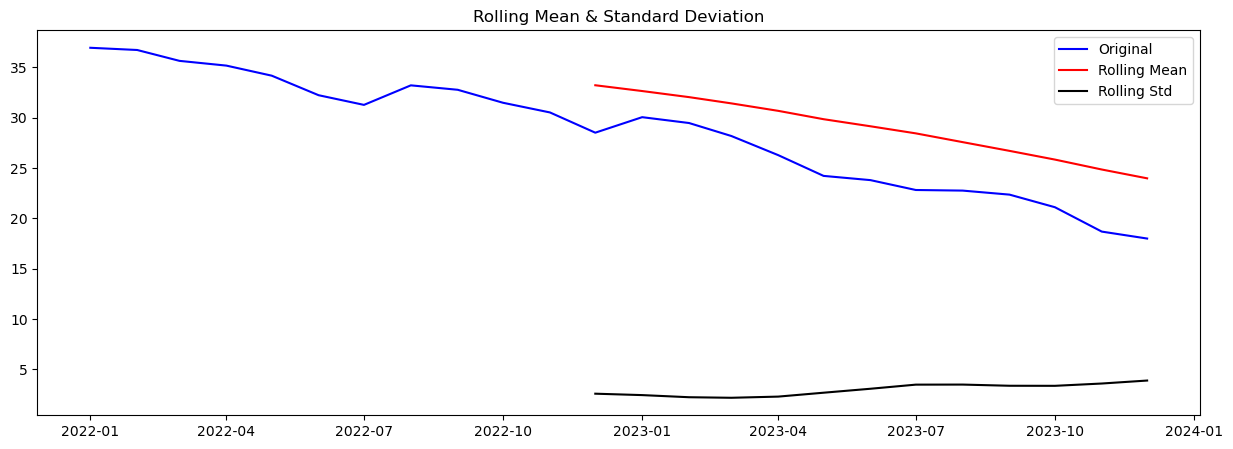

Results of Dickey-Fuller Test:
Test Statistic                 1.24
p-value                        1.00
#Lags Used                     4.00
Number of Observations Used   19.00
Critical Value (1%)           -3.83
Critical Value (5%)           -3.03
Critical Value (10%)          -2.66
dtype: float64


In [88]:
test_stationarity(data_TO)

### a. Creating forecast & train indexes

In [6]:

predict_start_date_TO = pd.to_datetime('2023-09-01')
predict_end_date_TO = pd.to_datetime('2024-12-01')

df_tr_TO = df[df['PERPAI'] < predict_start_date_TO]
df_forecast_TO = df[df['PERPAI'] >= predict_start_date_TO]

data_train_TO = pd.Series(list(df_tr_TO['Turnover']), index=list(df_tr_TO['PERPAI'] ))
data_forecast_TO = pd.Series(list(df_forecast_TO['Turnover']), index=list(df_forecast_TO['PERPAI'] ))

In [7]:
train_index_TO = pd.date_range(start=data_train_TO.index[0], end=data_train_TO.index[-1], freq='MS')
forecast_index_TO = pd.date_range(start=data_forecast_TO.index[0], end=predict_end_date_TO, freq='MS')

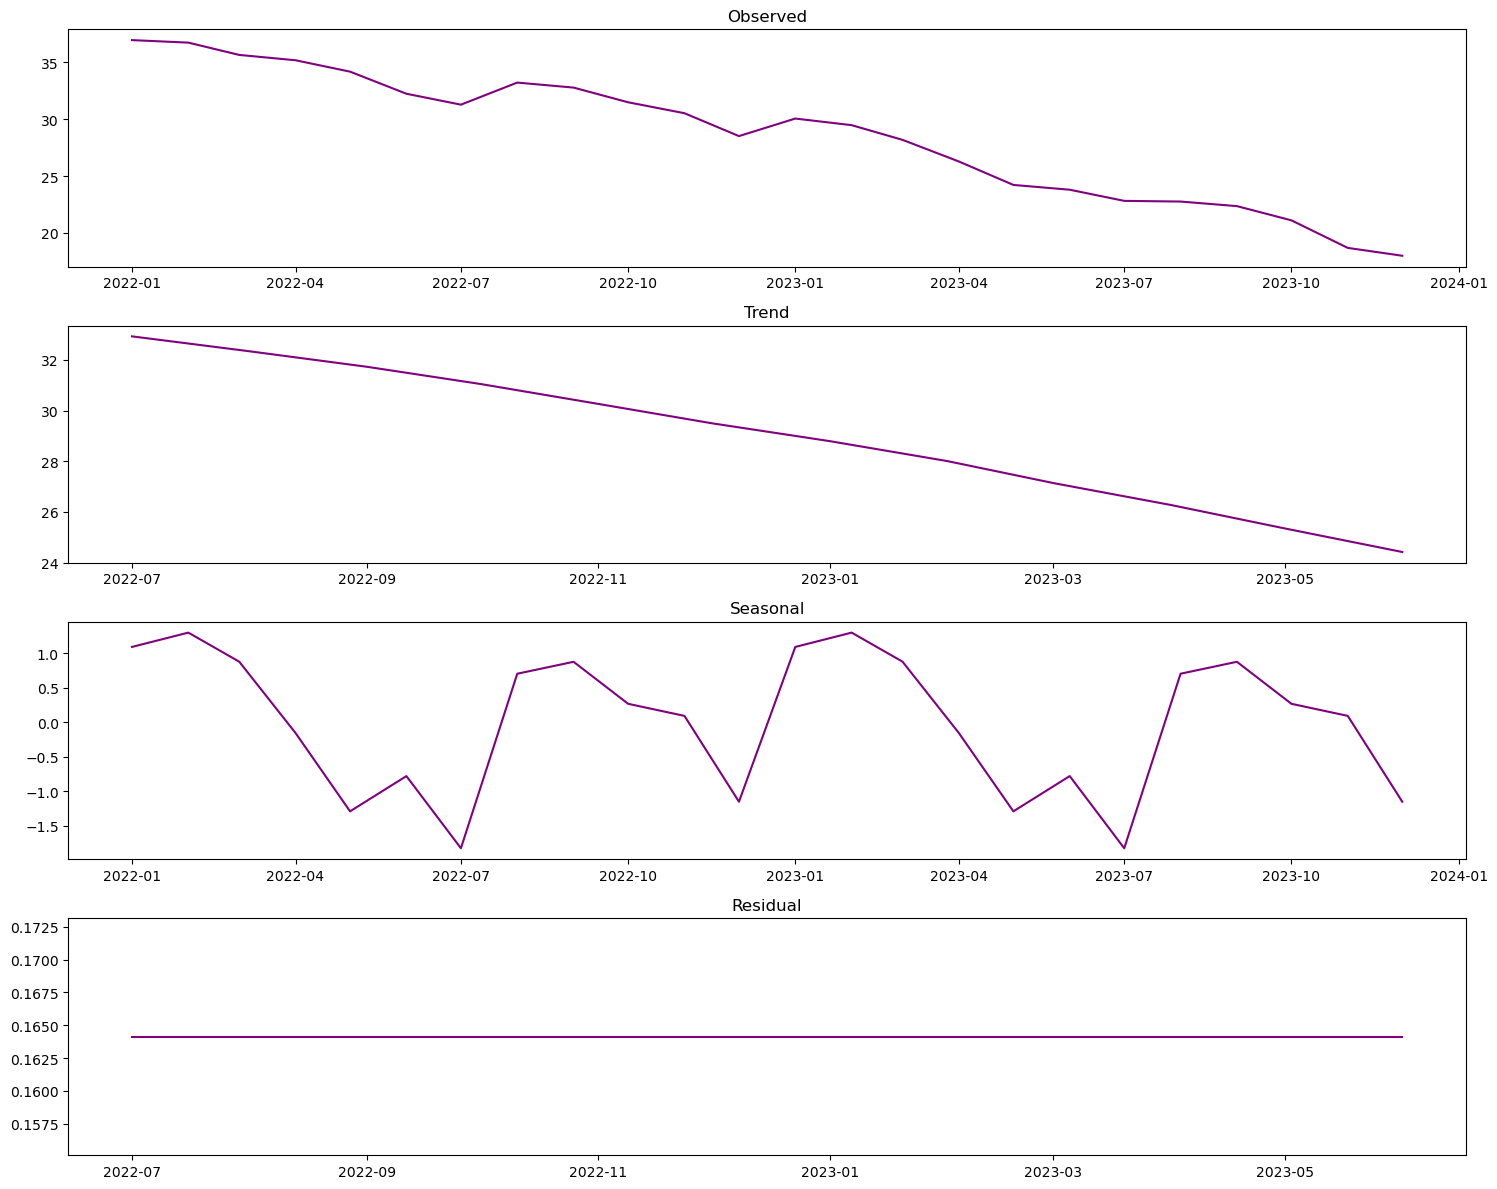

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result_TO = seasonal_decompose(data_TO, model='additive', period=12)  # Assuming daily seasonality for hourly data

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plot observed data
axes[0].plot(result_TO.observed, color='purple')
axes[0].set_title('Observed')

# Plot trend data
axes[1].plot(result_TO.trend, color='purple')
axes[1].set_title('Trend')

# Plot seasonal data
axes[2].plot(result_TO.seasonal, color='purple')
axes[2].set_title('Seasonal')

# Plot residual data
axes[3].plot(result_TO.resid, color='purple')
axes[3].set_title('Residual')

# Adjust layout and show plot
plt.tight_layout()

fig.savefig("Turnover.png")
plt.show()


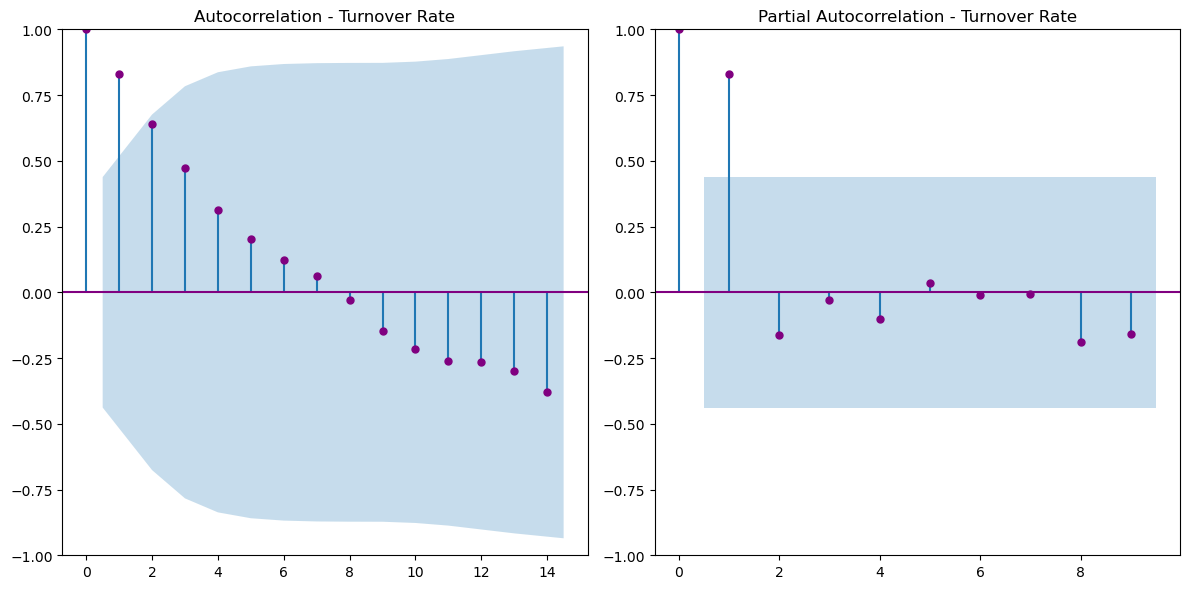

In [9]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_train_TO, ax=axes[0],  color='purple')
axes[0].set_title('Autocorrelation - Turnover Rate')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_train_TO, ax=axes[1], lags=9,  color='purple')  
axes[1].set_title('Partial Autocorrelation - Turnover Rate')


plt.tight_layout()
fig.savefig(" ACF - PACF - Turnover.png")
plt.show()

#### Interpretation
- The Autocorrelation plot shows 1 to 2 significant lags : over the confidence interval(area in light blue), then decreases steadily and starts rising again with the most signifiacnt lags at the 12th and 15th position.  This suggest MA(q = 1 or q = 2).
- The Partial Autocorrelation plot shows 1 significant lag : the 1st one. This suggest AR(p = 1).

--> Which results in **ARIMA(1,I,2)**

### b. Differencing

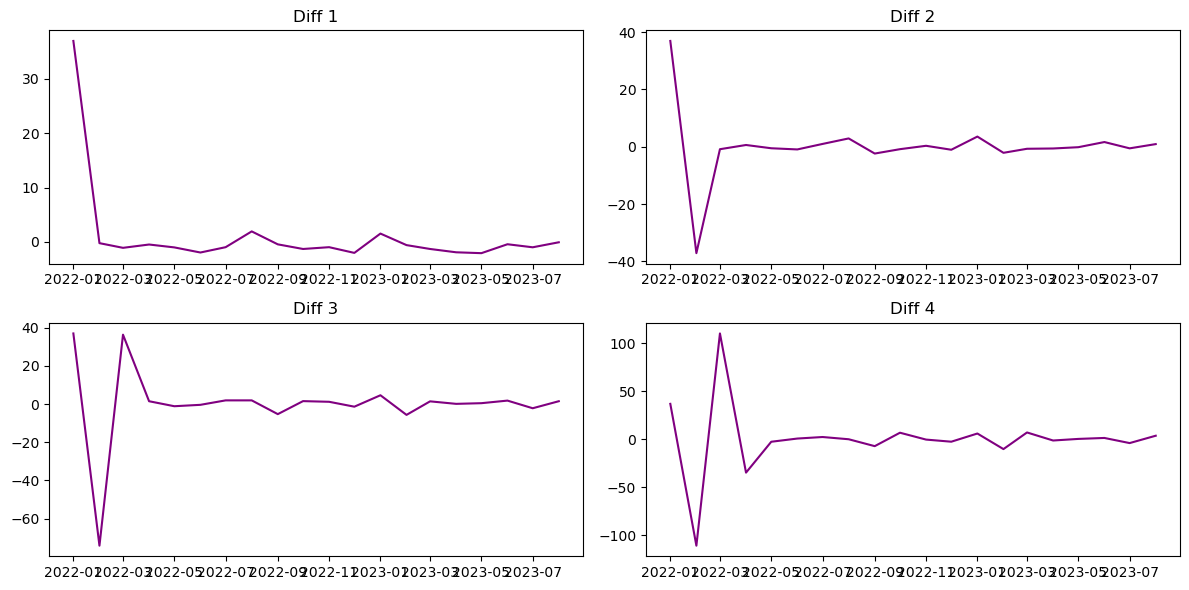

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Calculate the first and second differenced data
data_diff_TO = data_train_TO.diff().fillna(data_train_TO)
data_diff2_TO = data_diff_TO.diff().fillna(data_diff_TO)
data_diff3_TO= data_diff2_TO.diff().fillna(data_diff2_TO)
data_diff4_TO = data_diff3_TO.diff().fillna(data_diff3_TO)

axes[0, 0].plot(data_diff_TO, color='purple')
axes[0, 0].set_title('Diff 1')

# Plot second differenced data on the second subplot
axes[0, 1].plot(data_diff2_TO, color='purple')
axes[0, 1].set_title('Diff 2')

# Plot third differenced data on the third subplot
axes[1, 0].plot(data_diff3_TO, color='purple')
axes[1, 0].set_title('Diff 3')

# Plot fourth differenced data on the fourth subplot
axes[1, 1].plot(data_diff4_TO, color='purple')
axes[1, 1].set_title('Diff 4')


# Adjust layout and show plot
plt.tight_layout()
fig.savefig("Differencing - Turnover.png")
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [13]:
# data_diff_TO = data_train_TO.diff().dropna()
# data_diff2_TO = data_diff_TO.diff().dropna()
# data_diff3_TO = data_diff2_TO.diff().dropna()
# data_diff4_TO = data_diff3_TO.diff().dropna()

data_diff_TO = data_train_TO.diff().fillna(data_train_TO)
data_diff2_TO = data_diff_TO.diff().fillna(data_diff_TO)
data_diff3_TO= data_diff2_TO.diff().fillna(data_diff2_TO)
data_diff4_TO = data_diff3_TO.diff().fillna(data_diff3_TO)

perform_adf_test(data_diff_TO)
perform_adf_test(data_diff2_TO)
perform_adf_test(data_diff3_TO)
perform_adf_test(data_diff4_TO)

ADF Statistic: 0.266544
p-value: 0.975756
ADF Statistic: -0.364792
p-value: 0.915813
ADF Statistic: -3.932010
p-value: 0.001812
ADF Statistic: -2.118572
p-value: 0.237113


#### ==> The 3rd difference gave pvalue 0.01 < 5% , therefore, we will be choosing difference order = 3. (since it declines the null hypothesis)

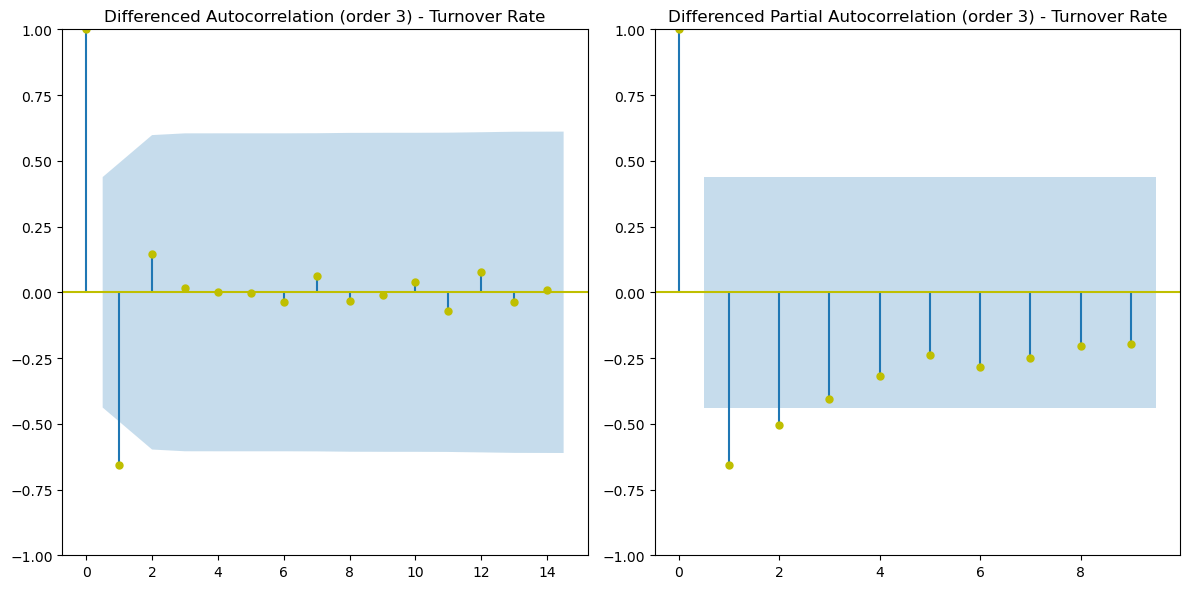

In [14]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data_diff3_TO, ax=axes[0], lags=14, color='y')
axes[0].set_title('Differenced Autocorrelation (order 3) - Turnover Rate')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_diff3_TO, ax=axes[1], lags=9, color='y')  
axes[1].set_title('Differenced Partial Autocorrelation (order 3) - Turnover Rate')


plt.tight_layout()
plt.show()

### c. SARIMA fitting

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_TO = SARIMAX(data_train_TO, order=(1,3,2),seasonal_order=(2,0,1,6))
model_TO_fit = model_TO.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [16]:
print(model_TO_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   20
Model:             SARIMAX(1, 3, 2)x(2, 0, [1], 6)   Log Likelihood                 -32.048
Date:                             Tue, 25 Jun 2024   AIC                             78.096
Time:                                     10:25:58   BIC                             83.928
Sample:                                 01-01-2022   HQIC                            78.675
                                      - 08-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8821      1.178     -0.749      0.454      -3.191       1.427
ma.L1       3.666e-05    70

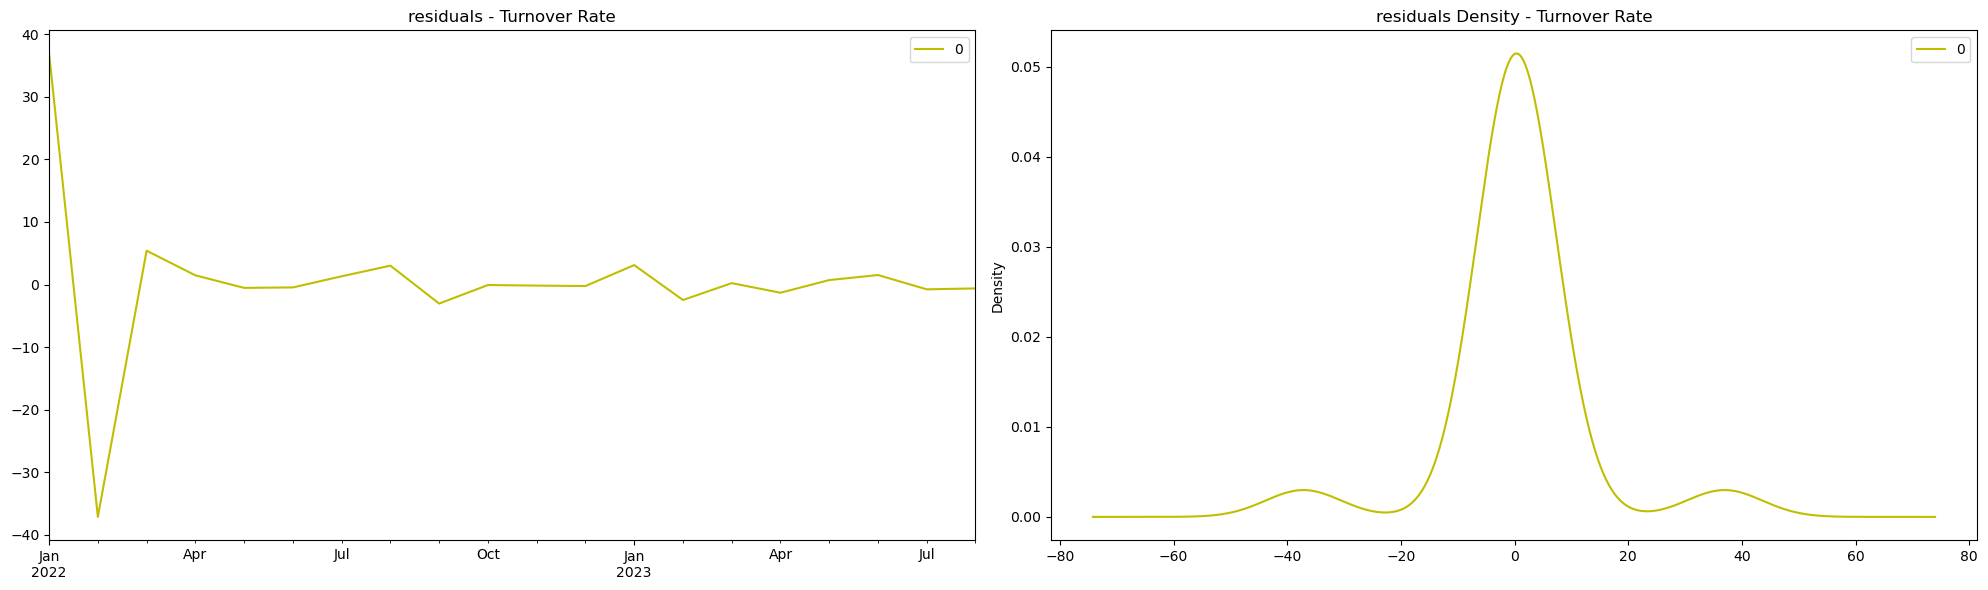

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals_TO = pd.DataFrame(model_TO_fit.resid)
residuals_TO.plot(ax=axes[0],c='y')
axes[0].set_title('residuals - Turnover Rate')

# density plot of residuals
residuals_TO.plot(kind='kde',ax=axes[1],c='y')
axes[1].set_title('residuals Density - Turnover Rate')

plt.tight_layout()

fig.savefig(" Residuals - Turnover.png")
plt.show()

In [18]:
# summary stats of residuals
print(residuals_TO.describe())

           0
count  20.00
mean    0.34
std    12.18
min   -37.16
25%    -0.66
50%    -0.13
75%     1.48
max    36.94


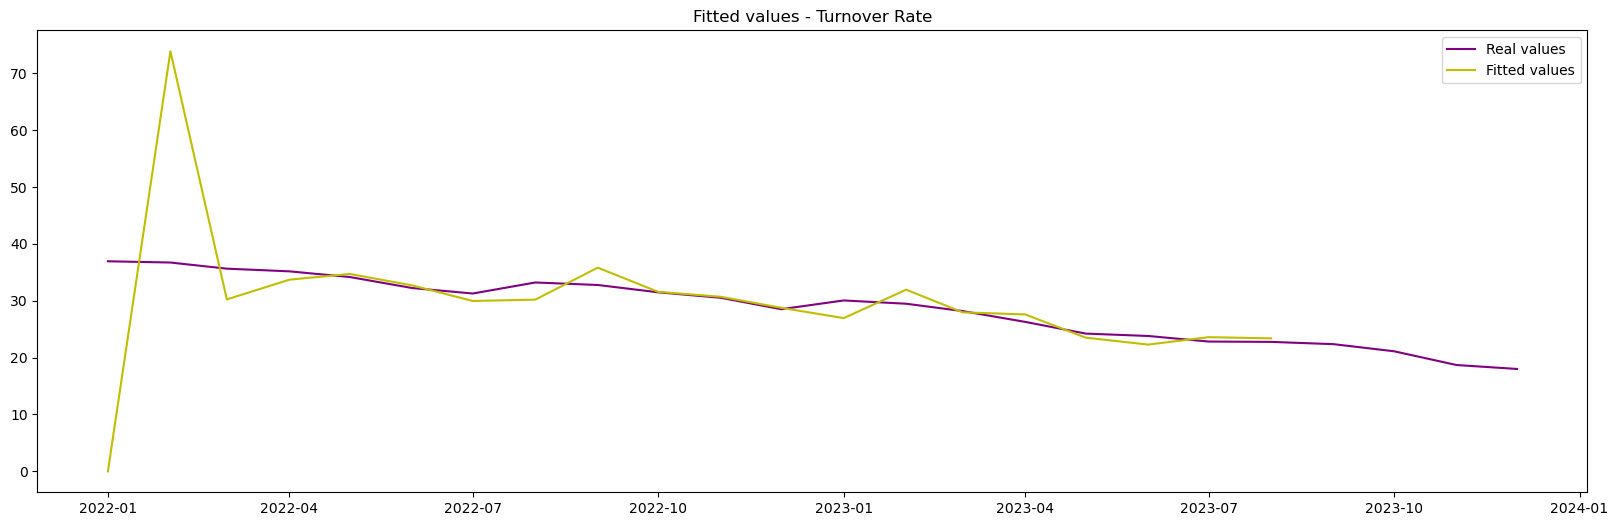

In [19]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data_TO, color='purple')
plt.plot(model_TO_fit.fittedvalues, color='y')
plt.title('Fitted values - Turnover Rate')
plt.legend(['Real values','Fitted values'])

plt.savefig(" Turnover -Fitted.png")

plt.show()

### d. Forecast

In [21]:
forecast_TO = model_TO_fit.predict(start=forecast_index_TO[0], end=forecast_index_TO[-1])

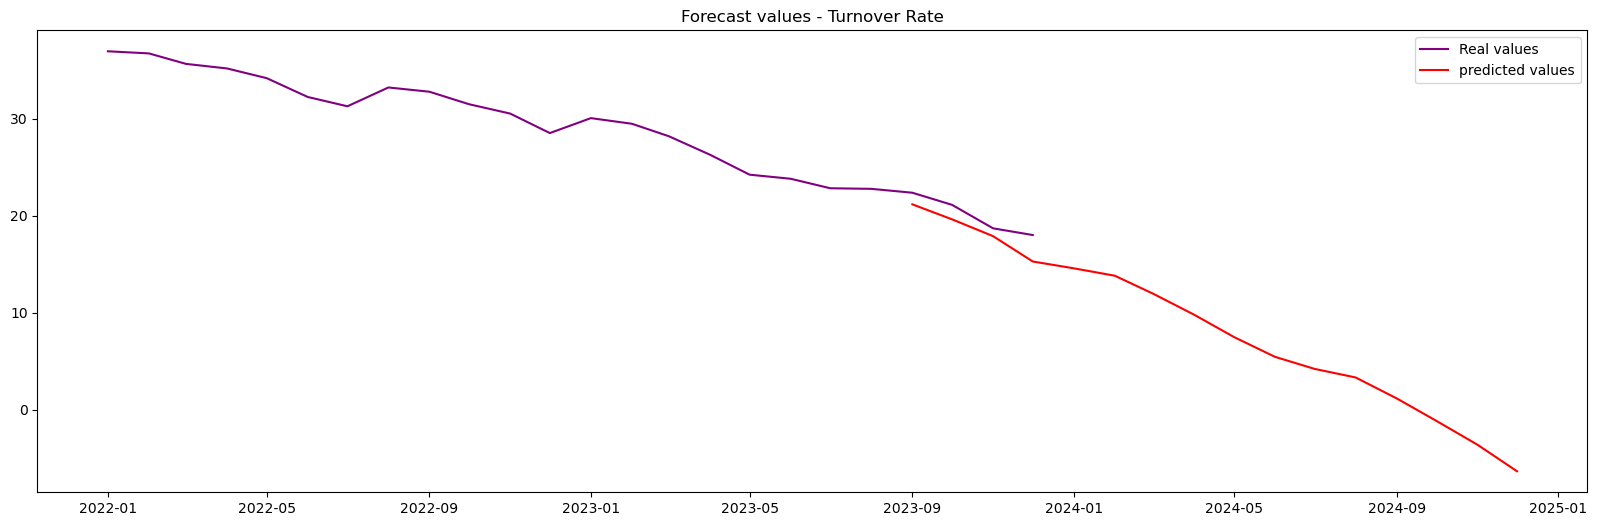

In [22]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data_TO,color='purple')
plt.plot(forecast_TO, color='r')
plt.title('Forecast values - Turnover Rate')
plt.legend(['Real values','predicted values'])

plt.savefig("Turnover - Forecast short.png")
plt.show()

### e. Evaluate Forecast

In [23]:
def evaluate_forecast(col, forecast):
    # compute mae
    mae_train = mean_absolute_error(train[col].values, forecast[:len(train)])
    mae_val = mean_absolute_error(val[col].values, forecast[-len(val):])

    # compute mse
    mse_train = mean_squared_error(train[col].values, forecast[:len(train)])
    mse_val = mean_squared_error(val[col].values, forecast[-len(val):])

    # compute mean_absolute_percentage_error
    mape_train = mean_absolute_percentage_error(train[col].values, forecast[:len(train)])
    mape_val = mean_absolute_percentage_error(val[col].values, forecast[-len(val):])

    # make a df to store the results
    df = pd.DataFrame({'mae': [mae_train, mae_val], 'mse': [mse_train, mse_val], 'mape': [mape_train, mape_val]}, index=['train', 'val'])
    return df

# DEMO

In [31]:
def Forecast_Turnover(Forecast_Start_date,Forecast_End_date) : 

    Forecast_Start_date = pd.to_datetime(Forecast_Start_date, format='%Y-%m-%d')
    Forecast_End_date = pd.to_datetime(Forecast_End_date, format='%Y-%m-%d')
    
    forecast_index = pd.date_range(start=Forecast_Start_date, end=Forecast_End_date, freq='MS')
    forecast = model_TO_fit.predict(start=forecast_index[0], end=forecast_index[-1])
    
    plt.subplots(1, 1, figsize=(20, 6))

    plt.plot(data_TO,color='purple')
    plt.plot(forecast, color='r')
    plt.title('TurnOver Forecast values')
    plt.legend(['Real values','predicted values'])

    plt.savefig("Turnover - Forecast long.png")
    
    plt.show()

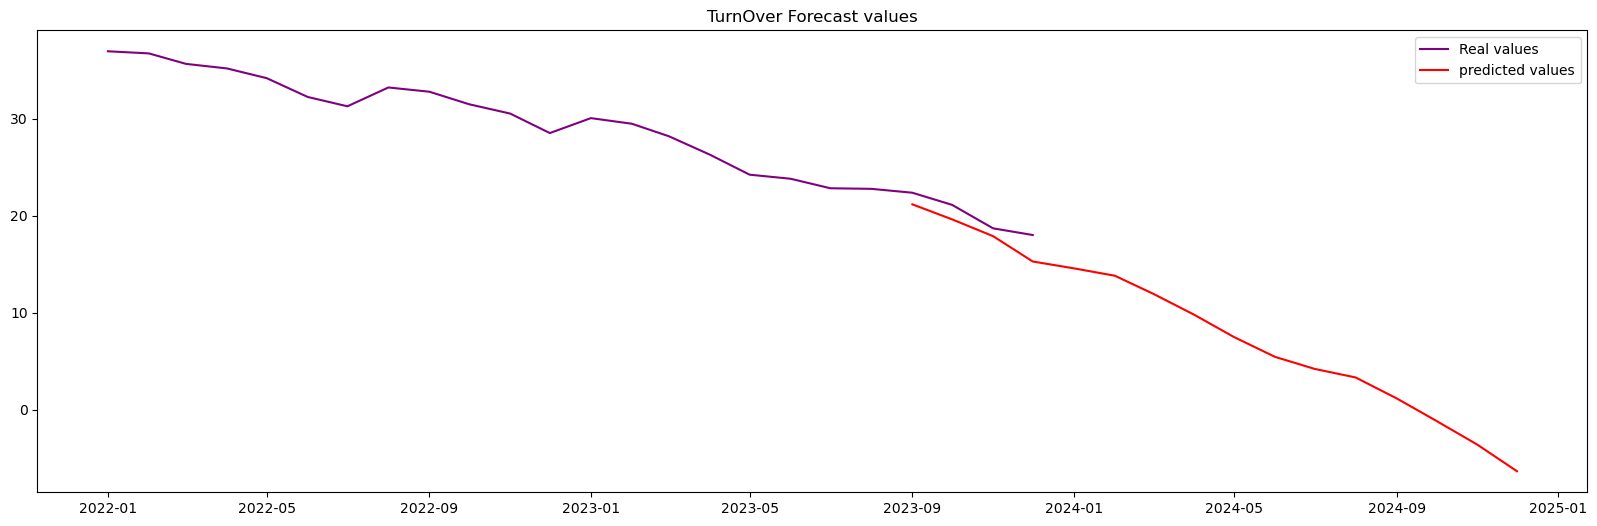

In [32]:
Forecast_Turnover('2023-09-01','2024-12-01')